In [1]:
# Import libraries
try:
    # Importing general libraries
    import os
    import glob
    import pandas as pd
    import joblib

    # Importing libraries for data visualization
    import matplotlib.pyplot as plt
    import numpy as np

    # Importing libraries for model building
    from sklearn.inspection import PartialDependenceDisplay
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, make_scorer

    # Importing libraries for data preprocessing
    from scipy.stats import randint

except Exception as e:
    print(f"Error : {e}")

In [2]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [3]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['partType', 'microstructure', 'seedLocation', 'castType']


In [5]:
# Creating a copy of the dataframe to ensure we maintain the original intact
label_encoded_df = df.copy()
encoder_name = "Label Encoding"

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    label_encoded_df[col] = le.fit_transform(label_encoded_df[col])
    label_encoders[col] = le  # Store the encoder_name for inverse transformation if needed later

# Display the first few rows to verify
display(label_encoded_df.head())

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,2,1,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,0,1
1,1793.64,1,2,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,0,2
2,700.60,0,1,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,0,2
3,1082.10,2,0,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,1,0
4,1838.83,0,0,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,1,1


In [6]:
# Define the target variable and feature set
X = label_encoded_df.drop(columns=['Lifespan'])  # Features
y = label_encoded_df['Lifespan']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
print(f'--- {encoder_name} Shape ---\n')
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- Label Encoding Shape ---

X_train shape: (800, 15)
X_test shape: (200, 15)
y_train shape: (800,)
y_test shape: (200,)


In [7]:
# Initialize the Random Forest Regressor with default parameters
RFModel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the training data
RFModel.fit(X_train, y_train)

# Make predictions on the test set
predictions = RFModel.predict(X_test)

# Evaluate the model using RMSE, R² Score, and MAE
rmse = root_mean_squared_error(y_test, predictions)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)                   # R² Score
mae = mean_absolute_error(y_test, predictions)       # Mean Absolute Error
msle = mean_squared_log_error(y_test, predictions)   # Mean Squared Log Error

print(f"--- Performance of {encoder_name} ---\n")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

--- Performance of Label Encoding ---

RMSE: 90.95
R² Score: 0.92
MAE: 72.50


In [8]:
# Features to drop based on low importance for Label Encoding
low_importance_features = ['seedLocation', 'microstructure', 'castType', 'smallDefects', 'sliverDefects']

In [9]:
print(f"--- {encoder_name} Shape Reduction ---")

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
print("\nOriginal Shapes")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Features to drop based on low importance
low_importance_features = ['seedLocation', 'microstructure', 'castType', 'smallDefects', 'sliverDefects']

# Create a new DataFrame excluding these features
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Display the shapes of the training and testing sets to verify
print("\nUpdated Shapes")
print("X_train_reduced shape:", X_train_reduced.shape)
print("X_test_reduced shape:", X_test_reduced.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- Label Encoding Shape Reduction ---

Original Shapes
X_train shape: (800, 15)
X_test shape: (200, 15)
y_train shape: (800,)
y_test shape: (200,)

Updated Shapes
X_train_reduced shape: (800, 10)
X_test_reduced shape: (200, 10)
y_train shape: (800,)
y_test shape: (200,)


In [10]:
# Initialize the Random Forest Regressor with best parameters
RFModel = RandomForestRegressor(
    max_depth=15,
    n_estimators=387,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data
RFModel.fit(X_train_reduced, y_train)

# Make predictions on the test set
predictions = RFModel.predict(X_test_reduced)

# Evaluate the model using RMSE, R² Score, and MAE
rmse = root_mean_squared_error(y_test, predictions)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)  # R² Score
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
msle = mean_squared_log_error(y_test, predictions)  # Mean Squared Log Error

print(f"--- Performance of {encoder_name} ---\n")
print(f"Reduced Features RMSE: {rmse:.2f}")
print(f"Reduced Features R² Score: {r2:.2f}")
print(f"Reduced Features MAE: {mae:.2f}")

--- Performance of Label Encoding ---

Reduced Features RMSE: 88.10
Reduced Features R² Score: 0.93
Reduced Features MAE: 70.68


In [11]:
# Creating a copy of the dataframe to ensure we maintain the original intact
onehot_encoded_df = df.copy()
encoder_name = "One-Hot Encoding"

# Initialize and fit the encoder_name
ohe = OneHotEncoder(sparse_output=False, dtype=int, drop=None)
# Reshape the data to handle multiple categorical columns
encoded_data = ohe.fit_transform(onehot_encoded_df[categorical_cols].values)

# Convert to DataFrame with feature names
encoded_df = pd.DataFrame(
    encoded_data,
    columns=ohe.get_feature_names_out(categorical_cols)
)

# Combine with non-categorical columns if needed
onehot_encoded_df = pd.concat([onehot_encoded_df.drop(columns=categorical_cols), encoded_df], axis=1)

# Display the first few rows to verify
display(onehot_encoded_df.head())

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,1469.17,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,...,1,0,0,1,0,1,0,0,1,0
1,1793.64,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,...,0,0,0,0,1,1,0,0,0,1
2,700.60,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,...,0,0,0,1,0,1,0,0,0,1
3,1082.10,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,...,1,0,1,0,0,0,1,1,0,0
4,1838.83,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,...,0,0,1,0,0,0,1,0,1,0


In [12]:
# Define the target variable and feature set
X = onehot_encoded_df.drop(columns=['Lifespan'])  # Features
y = onehot_encoded_df['Lifespan']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
print(f'--- {encoder_name} Shape ---\n')
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- One-Hot Encoding Shape ---

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


In [13]:
# Initialize the Random Forest Regressor with default parameters
RFModel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the training data
RFModel.fit(X_train, y_train)

# Make predictions on the test set
predictions = RFModel.predict(X_test)

# Evaluate the model using RMSE, R² Score, and MAE
rmse = root_mean_squared_error(y_test, predictions)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)  # R² Score
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
msle = mean_squared_log_error(y_test, predictions)  # Mean Squared Log Error

print(f"--- Performance of {encoder_name} ---\n")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

--- Performance of One-Hot Encoding ---

RMSE: 85.15
R² Score: 0.93
MAE: 67.46


In [14]:
# Train the final model with the best parameters with the best parameters
RFModel = RandomForestRegressor(
    max_depth=15,
    n_estimators=387,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
RFModel.fit(X_train, y_train)

# Make predictions on the test set
predictions = RFModel.predict(X_test)

# Evaluate the model using RMSE, R² Score, and MAE
rmse = root_mean_squared_error(y_test, predictions)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)  # R² Score
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
msle = mean_squared_log_error(y_test, predictions)  # Mean Squared Log Error

print(f"--- Performance of {encoder_name} ---\n")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

--- Performance of One-Hot Encoding ---

RMSE: 84.22
R² Score: 0.93
MAE: 66.66


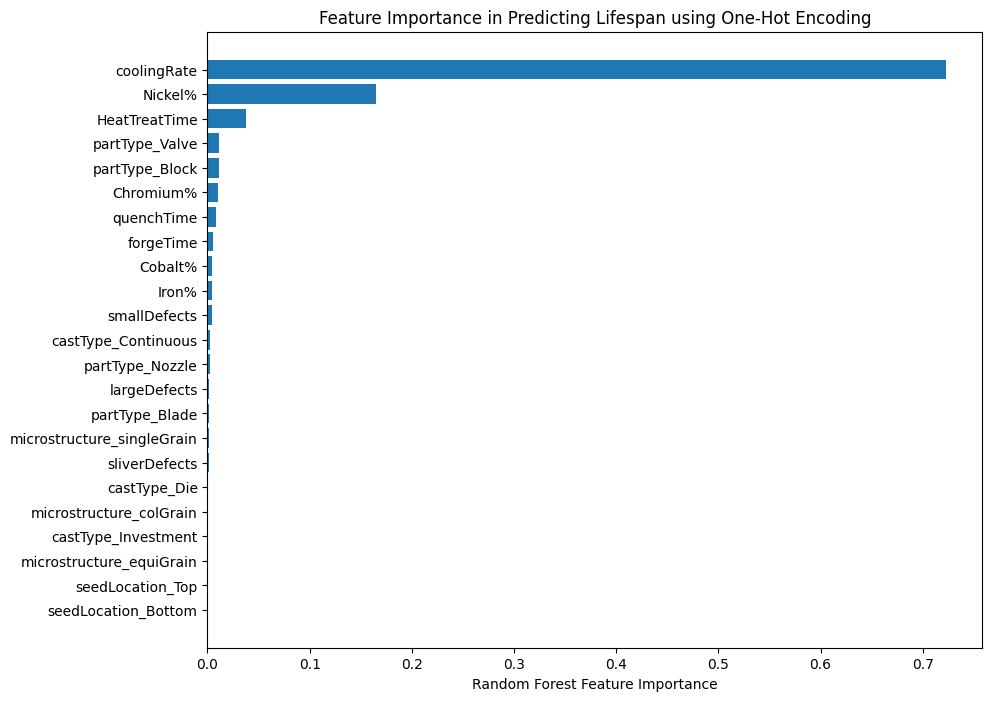

In [15]:
# Feature importance analysis
feature_importances = RFModel.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title(f"Feature Importance in Predicting Lifespan using {encoder_name}")
plt.show()

In [16]:
print(f"--- Features saved with {encoder_name} ---\n")
for col in X.columns:
    print(f"- {col}")

--- Features saved with One-Hot Encoding ---

- coolingRate
- quenchTime
- forgeTime
- HeatTreatTime
- Nickel%
- Iron%
- Cobalt%
- Chromium%
- smallDefects
- largeDefects
- sliverDefects
- partType_Blade
- partType_Block
- partType_Nozzle
- partType_Valve
- microstructure_colGrain
- microstructure_equiGrain
- microstructure_singleGrain
- seedLocation_Bottom
- seedLocation_Top
- castType_Continuous
- castType_Die
- castType_Investment


In [17]:
# Selecting only the most important features (those with non-zero or significant importance)
important_features = ['partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve', 'coolingRate', 'Nickel%', 'HeatTreatTime', 'Chromium%' , 'quenchTime']
reduced_df = onehot_encoded_df[important_features]

# Split the dataset and retrain the model
X_train, X_test, y_train, y_test = train_test_split(reduced_df, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with reduced features with the best parameters
RFModel = RandomForestRegressor(
    max_depth=15,
    n_estimators=387,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
model_name='Random Forest Regressor'
RFModel.fit(X_train, y_train)

# Evaluate the model
predictions = RFModel.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
msle = mean_squared_log_error(y_test, predictions)

print(f'--- Updated {encoder_name} Performance on {model_name} ---\n')
print(f"Reduced Features RMSE: {rmse:.2f}")
print(f"Reduced Features R² Score: {r2:.2f}")
print(f"Reduced Features MAE: {mae:.2f}")
print(f"Reduced Features MSLE: {msle:.2f}")

--- Updated One-Hot Encoding Performance on Random Forest Regressor ---

Reduced Features RMSE: 78.70
Reduced Features R² Score: 0.94
Reduced Features MAE: 61.14
Reduced Features MSLE: 0.01


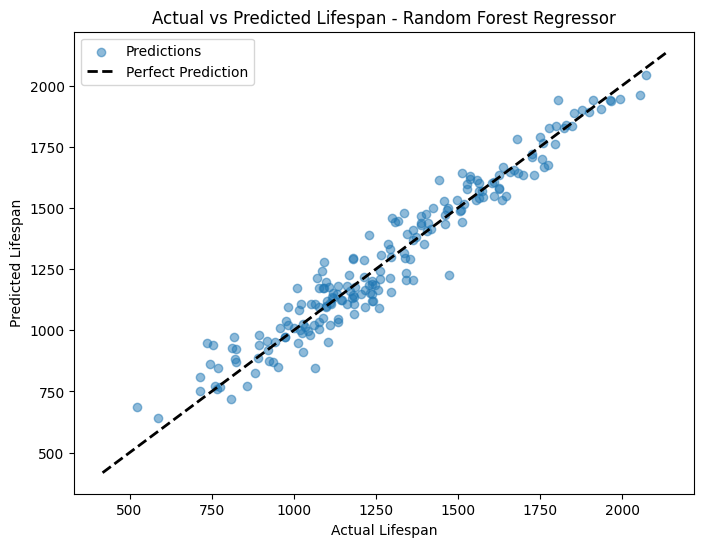

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Predictions')
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title(f"Actual vs Predicted Lifespan - {model_name}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line for perfect predictions
plt.legend()
plt.show()

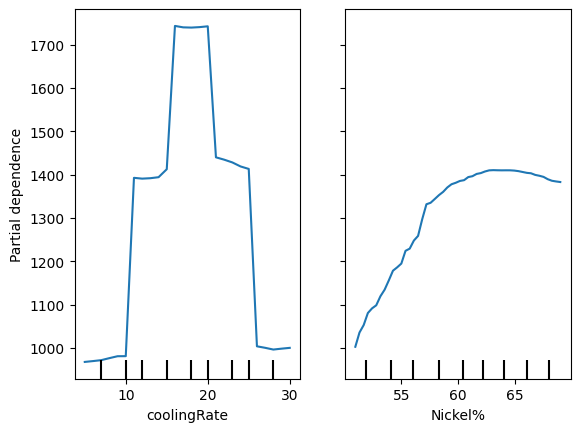

In [19]:
# Plot partial dependence for important features using the new API
features_to_plot = ['coolingRate', 'Nickel%']
PartialDependenceDisplay.from_estimator(RFModel, X_train, features_to_plot, grid_resolution=50)
plt.show()

In [20]:
# Define the scoring metric: RMSE
scorer = make_scorer(root_mean_squared_error)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(RFModel, reduced_df, y, cv=5, scoring=scorer)

# Print results
print("Cross-Validation RMSE scores for each fold:\n", cv_scores)
print(f"Mean CV RMSE: {cv_scores.mean():.2f}")
print(f"Standard Deviation of CV RMSE: {cv_scores.std():.2f}")

Cross-Validation RMSE scores for each fold:
 [76.29236433 73.92386074 76.48493498 81.53121198 80.60598474]
Mean CV RMSE: 77.77
Standard Deviation of CV RMSE: 2.86


In [21]:
# %%
# Import StandardScaler if not already imported
from sklearn.preprocessing import StandardScaler

# Create a copy of the reduced DataFrame
scaled_df = reduced_df.copy()

# Define the target variable and feature set
X = scaled_df  # Features (already reduced)
y = onehot_encoded_df['Lifespan']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Since scaling returns a NumPy array, convert it back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Initialize and train the Random Forest Regressor with the best parameters
RFModel_scaled = RandomForestRegressor(
    max_depth=15,
    n_estimators=387,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
model_name = 'Random Forest Regressor with Scaling'
RFModel_scaled.fit(X_train_scaled, y_train_scaled)

# Evaluate the model
predictions_scaled = RFModel_scaled.predict(X_test_scaled)
rmse_scaled = mean_absolute_error(y_test_scaled, predictions_scaled)
r2_scaled = r2_score(y_test_scaled, predictions_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, predictions_scaled)
msle_scaled = mean_squared_log_error(y_test_scaled, predictions_scaled)

print(f'--- Performance of {model_name} ---\n')
print(f"RMSE: {rmse_scaled:.2f}")
print(f"R² Score: {r2_scaled:.2f}")
print(f"MAE: {mae_scaled:.2f}")
print(f"MSLE: {msle_scaled:.2f}")

# Compare with previous model's performance
print(f'\n--- Comparison with Previous Model (Without Scaling) ---\n')
print(f"Previous RMSE: {rmse:.2f}")
print(f"Previous R² Score: {r2:.2f}")
print(f"Previous MAE: {mae:.2f}")
print(f"Previous MSLE: {msle:.2f}")

--- Performance of Random Forest Regressor with Scaling ---

RMSE: 61.06
R² Score: 0.94
MAE: 61.06
MSLE: 0.01

--- Comparison with Previous Model (Without Scaling) ---

Previous RMSE: 78.70
Previous R² Score: 0.94
Previous MAE: 61.14
Previous MSLE: 0.01


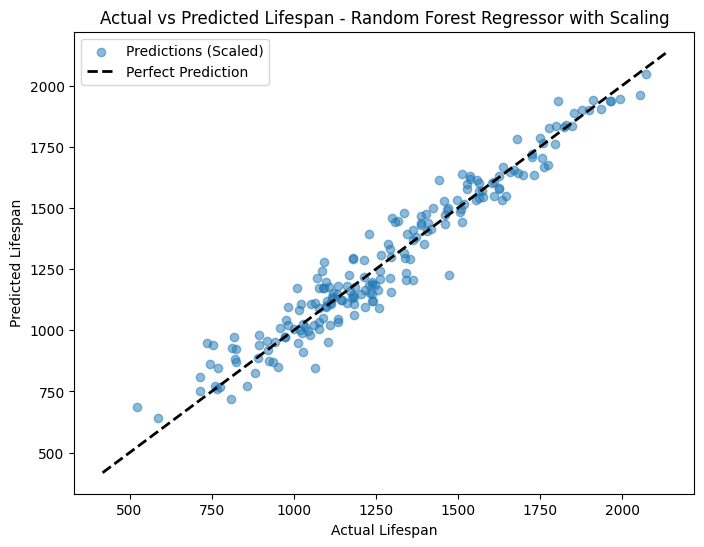

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, predictions_scaled, alpha=0.5, label='Predictions (Scaled)')
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title(f"Actual vs Predicted Lifespan - {model_name}")
plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
    'k--',
    lw=2,
    label='Perfect Prediction'
)  # Diagonal line for perfect predictions
plt.legend()
plt.show()

In [23]:
# Define the scoring metric: RMSE
scorer = make_scorer(mean_absolute_error)  # Using MAE for consistency

# Perform 5-Fold Cross-Validation on the scaled data
cv_scores_scaled = cross_val_score(
    RFModel_scaled, X_train_scaled, y_train_scaled, cv=5, scoring=scorer
)

# Print results
print("Cross-Validation MAE scores for each fold (Scaled Data):\n", cv_scores_scaled)
print(f"Mean CV MAE: {cv_scores_scaled.mean():.2f}")
print(f"Standard Deviation of CV MAE: {cv_scores_scaled.std():.2f}")

Cross-Validation MAE scores for each fold (Scaled Data):
 [67.97881356 61.19341549 63.45087863 64.23950505 70.85466072]
Mean CV MAE: 65.54
Standard Deviation of CV MAE: 3.44


Loaded dataset: ../Datasets/Dataset.csv
Categorical columns: ['partType', 'microstructure', 'seedLocation', 'castType']
--- Performance of Random Forest with Scaling ---

RMSE: 78.66
R² Score: 0.94
MAE: 61.06


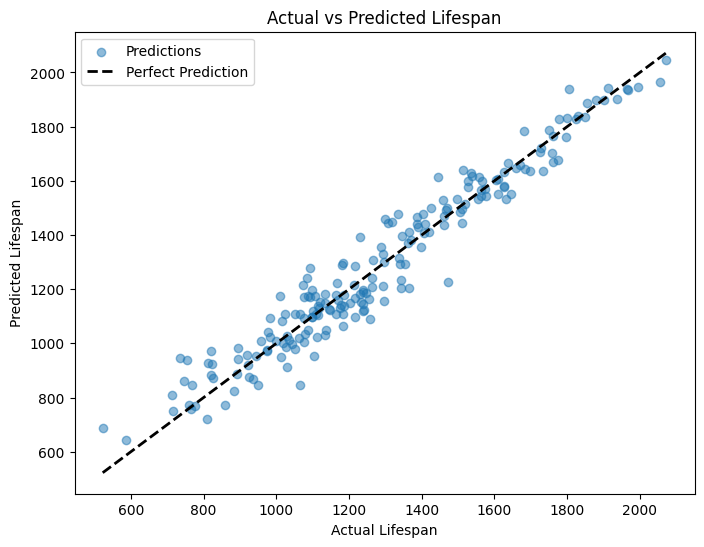


Cross-Validation Results:
Mean CV MAE: 65.54
Standard Deviation of CV MAE: 3.44

Generating random predictions from test set...

=== Random Predictions from Test Set ===

Format: Feature Name: Value

Sample Features:
partType_Blade: 1.74
partType_Block: -0.58
partType_Nozzle: -0.55
partType_Valve: -0.60
coolingRate: -0.76
Nickel%: -1.01
HeatTreatTime: -1.67
Chromium%: 1.10
quenchTime: -1.35

Prediction Results:
Predicted Lifespan: 1296.69 hours
Actual Lifespan: 1182.12 hours
Absolute Error: 114.57 hours
Error Percentage: 9.69%

Sample Features:
partType_Blade: -0.57
partType_Block: -0.58
partType_Nozzle: -0.55
partType_Valve: 1.65
coolingRate: -0.49
Nickel%: 1.42
HeatTreatTime: 0.88
Chromium%: -0.88
quenchTime: 0.51

Prediction Results:
Predicted Lifespan: 1405.65 hours
Actual Lifespan: 1407.26 hours
Absolute Error: 1.61 hours
Error Percentage: 0.11%

Sample Features:
partType_Blade: 1.74
partType_Block: -0.58
partType_Nozzle: -0.55
partType_Valve: -0.60
coolingRate: 0.86
Nickel%: -0.

In [24]:
# Import required libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    root_mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
    make_scorer
)
from scipy.stats import randint

# Set up paths and directories
data_path = '../Datasets/*.csv'
destination = '../Models/'
os.makedirs(destination, exist_ok=True)

# Load the dataset
file_list = glob.glob(data_path)
if len(file_list) == 1:
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

def apply_onehot_encoding(df):
    """
    Apply one-hot encoding to categorical columns
    """
    onehot_encoded_df = df.copy()
    ohe = OneHotEncoder(sparse_output=False, dtype=int, drop=None)
    encoded_data = ohe.fit_transform(onehot_encoded_df[categorical_cols].values)
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=ohe.get_feature_names_out(categorical_cols)
    )
    onehot_encoded_df = pd.concat(
        [onehot_encoded_df.drop(columns=categorical_cols), encoded_df],
        axis=1
    )
    return onehot_encoded_df, ohe

def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_name="Random Forest"):
    """
    Train and evaluate the Random Forest model
    """
    model = RandomForestRegressor(
        max_depth=15,
        n_estimators=387,
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    print(f"--- Performance of {model_name} ---\n")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    
    return model, predictions, (rmse, r2, mae)

def plot_actual_vs_predicted(y_test, predictions, title="Actual vs Predicted Lifespan"):
    """
    Create scatter plot of actual vs predicted values
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5, label='Predictions')
    plt.xlabel("Actual Lifespan")
    plt.ylabel("Predicted Lifespan")
    plt.title(title)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--',
        lw=2,
        label='Perfect Prediction'
    )
    plt.legend()
    plt.show()

def make_random_predictions(model, X_test, y_test, n_predictions=5):
    """
    Make predictions on random samples from the test set
    
    Parameters:
    -----------
    model : sklearn estimator
        Trained model
    X_test : pd.DataFrame
        Test features
    y_test : pd.Series
        True test values
    n_predictions : int
        Number of random predictions to make
    """
    # Get random indices from test set
    test_indices = random.sample(range(len(X_test)), n_predictions)
    
    print("\n=== Random Predictions from Test Set ===")
    print("\nFormat: Feature Name: Value")
    print("=" * 50)
    
    for idx in test_indices:
        # Get the sample and convert it to DataFrame to preserve feature names
        sample = X_test.iloc[[idx]]  # Using [[idx]] to keep DataFrame format
        true_value = y_test.iloc[idx]
        prediction = model.predict(sample)[0]  # No need to reshape
        
        # Calculate prediction error
        error = abs(prediction - true_value)
        error_percentage = (error / true_value) * 100
        
        print("\nSample Features:")
        for feature, value in sample.iloc[0].items():
            print(f"{feature}: {value:.2f}")
            
        print("\nPrediction Results:")
        print(f"Predicted Lifespan: {prediction:.2f} hours")
        print(f"Actual Lifespan: {true_value:.2f} hours")
        print(f"Absolute Error: {error:.2f} hours")
        print(f"Error Percentage: {error_percentage:.2f}%")
        print("=" * 50)

if __name__ == "__main__":
    # Apply one-hot encoding
    onehot_encoded_df, ohe = apply_onehot_encoding(df)
    
    # Important features based on analysis
    important_features = [
        'partType_Blade', 'partType_Block', 'partType_Nozzle', 
        'partType_Valve', 'coolingRate', 'Nickel%', 'HeatTreatTime', 
        'Chromium%', 'quenchTime'
    ]
    
    # Prepare data with important features only
    reduced_df = onehot_encoded_df[important_features]
    X = reduced_df
    y = onehot_encoded_df['Lifespan']
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert scaled arrays back to DataFrames
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
    
    # Train and evaluate model
    model, predictions, metrics = train_and_evaluate_model(
        X_train_scaled, X_test_scaled, y_train, y_test,
        "Random Forest with Scaling"
    )
    
    # Plot actual vs predicted
    plot_actual_vs_predicted(y_test, predictions)
    
    # Perform cross-validation
    scorer = make_scorer(mean_absolute_error)
    cv_scores = cross_val_score(
        model, X_train_scaled, y_train, cv=5, scoring=scorer
    )
    
    print("\nCross-Validation Results:")
    print(f"Mean CV MAE: {cv_scores.mean():.2f}")
    print(f"Standard Deviation of CV MAE: {cv_scores.std():.2f}")
    
    # Make random predictions
    print("\nGenerating random predictions from test set...")
    make_random_predictions(model, X_test_scaled, y_test)